In [1]:
import tensorflow as tf
tf.get_logger().setLevel('INFO')

2021-12-13 08:37:10.235864: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [2]:
import os

import numpy as np

import tensorflow as tf
assert tf.__version__.startswith('2')
tf.get_logger().setLevel('INFO')

from tflite_model_maker import model_spec
from tflite_model_maker import image_classifier
from tflite_model_maker.config import ExportFormat
from tflite_model_maker.config import QuantizationConfig
from tflite_model_maker.image_classifier import DataLoader

import matplotlib.pyplot as plt

In [3]:
train_data_path = "data/train"
test_data_path = "data/test"

import os
class_names = sorted(os.listdir(train_data_path))
class_names

['food', 'not_food']

In [7]:
tf.get_logger().setLevel('INFO')

In [8]:
# Create data loader
train_data = DataLoader.from_folder(train_data_path)
test_data = DataLoader.from_folder(test_data_path)

train_data, test_data

INFO:tensorflow:Load image with size: 47807, num_label: 2, labels: food, not_food.


INFO:tensorflow:Load image with size: 47807, num_label: 2, labels: food, not_food.


INFO:tensorflow:Load image with size: 11953, num_label: 2, labels: food, not_food.


INFO:tensorflow:Load image with size: 11953, num_label: 2, labels: food, not_food.


(<tensorflow_examples.lite.model_maker.core.data_util.image_dataloader.ImageClassifierDataLoader at 0x7fa1ac747a60>,
 <tensorflow_examples.lite.model_maker.core.data_util.image_dataloader.ImageClassifierDataLoader at 0x7fa1cc522b80>)

In [9]:
# Create model
model = image_classifier.create(train_data)

INFO:tensorflow:Retraining the models...


INFO:tensorflow:Retraining the models...


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2_1 (HubK (None, 1280)              3413024   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1280)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 2562      
Total params: 3,415,586
Trainable params: 2,562
Non-trainable params: 3,413,024
_________________________________________________________________
None
Epoch 1/5
1493/1493 [==============================] - 95s 63ms/step - loss: 0.2865 - accuracy: 0.9588
Epoch 2/5
1493/1493 [==============================] - 94s 63ms/step - loss: 0.2736 - accuracy: 0.9652
Epoch 3/5
1493/1493 [==============================] - 94s 63ms/step - loss: 0.2725 - accuracy: 0.9653
Epoch 4/5
1493/1493 [==============================] - 9

In [10]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_data)
test_loss, test_accuracy

374/374 [==============================] - 22s 58ms/step - loss: 0.2660 - accuracy: 0.9664


(0.2660052180290222, 0.9663682579994202)

In [11]:
# Save the model
model.export(export_dir='.', tflite_filename="models/food_not_food_model_v5.tflite")

2021-12-13 08:49:12.454923: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: /tmp/tmptoullmgy/assets


INFO:tensorflow:Assets written to: /tmp/tmptoullmgy/assets
2021-12-13 08:49:14.282303: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-13 08:49:14.282523: I tensorflow/core/grappler/devices.cc:69] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 1
2021-12-13 08:49:14.282589: I tensorflow/core/grappler/clusters/single_machine.cc:357] Starting new session
2021-12-13 08:49:14.282857: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-13 08:49:14.283000: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA TITAN RTX computeCapability: 7.5
coreClock: 1.77GHz coreCount: 72 deviceMemorySize: 23.65GiB devi

INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmpz3v7h9x6/labels.txt


INFO:tensorflow:Saving labels in /tmp/tmpz3v7h9x6/labels.txt


INFO:tensorflow:TensorFlow Lite model exported successfully: ./models/food_not_food_model_v5.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: ./models/food_not_food_model_v5.tflite


In [47]:
# Load image
def pred_and_plot(image_path, img_shape=224):
    # Read in the image
    img = tf.io.read_file(image_path)
    # Decode it into a tensor
    img = tf.image.decode_jpeg(img)
    # Resize the image
    img = tf.image.resize(img, [img_shape, img_shape])
    # Scale pixels
    img = img/255.
    preds = model.predict_top_k(tf.expand_dims(img, axis=0), k=2, batch_size=1)
    print(preds[0])

    plt.imshow(img)
    plt.axis(False)
    plt.title(f"Pred class: {preds[0][0][0]} | Prob: {float(preds[0][0][1]):.3f}")

[('food', 0.93645567), ('not_food', 0.06354433)]


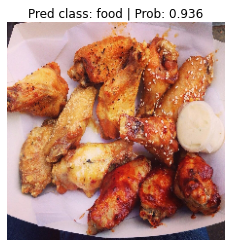

In [48]:
# Get image chicken wings
!wget https://raw.githubusercontent.com/mrdbourke/nutrify/main/images/sample-food-images/chicken_wings.jpeg
!mv chicken_wings.jpeg images/chicken_wings.jpeg
pred_and_plot("images/chicken_wings.jpeg")

In [49]:
# !wget https://images.hgmsites.net/hug/tesla-cybertruck_100725713_h.jpg
pred_and_plot("images/tesla_cyber_truck.jpg.jpg")

--2021-12-09 15:14:27--  https://images.hgmsites.net/hug/tesla-cybertruck_100725713_h.jpg
Resolving images.hgmsites.net (images.hgmsites.net)... 104.21.31.148, 172.67.177.203, 2606:4700:3030::6815:1f94, ...
Connecting to images.hgmsites.net (images.hgmsites.net)|104.21.31.148|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 220323 (215K) [image/jpeg]
Saving to: 'tesla-cybertruck_100725713_h.jpg’

tesla-cybertruck_10 100%[===================>] 215.16K   531KB/s    in 0.4s    

2021-12-09 15:14:28 (531 KB/s) - 'tesla-cybertruck_100725713_h.jpg’ saved [220323/220323]



--2021-12-09 15:16:00--  https://cdn.pocket-lint.com/r/s/1200x630/assets/images/152137-laptops-review-apple-macbook-pro-2020-review-image1-pbzm4ejvvs.jpg
Resolving cdn.pocket-lint.com (cdn.pocket-lint.com)... 13.226.107.121, 13.226.107.95, 13.226.107.83, ...
Connecting to cdn.pocket-lint.com (cdn.pocket-lint.com)|13.226.107.121|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 173515 (169K) [image/jpeg]
Saving to: '152137-laptops-review-apple-macbook-pro-2020-review-image1-pbzm4ejvvs.jpg’

152137-laptops-revi 100%[===================>] 169.45K   322KB/s    in 0.5s    

2021-12-09 15:16:02 (322 KB/s) - '152137-laptops-review-apple-macbook-pro-2020-review-image1-pbzm4ejvvs.jpg’ saved [173515/173515]

[('not_food', 0.8310447), ('food', 0.16895539)]


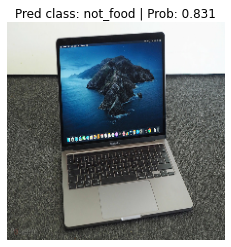

In [51]:
# !wget https://cdn.pocket-lint.com/r/s/1200x630/assets/images/152137-laptops-review-apple-macbook-pro-2020-review-image1-pbzm4ejvvs.jpg
pred_and_plot("images/apple_macbook_pro.jpg.jpg")